In [1]:
#setup

import numpy as np
import pandas as pd
import skimage as ski
import skimage.filters as skif
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
import PIL as pil
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import io
import cv2
from skimage.filters import threshold_local

def show_image(image):
    plt.imshow(image)
    plt.show()

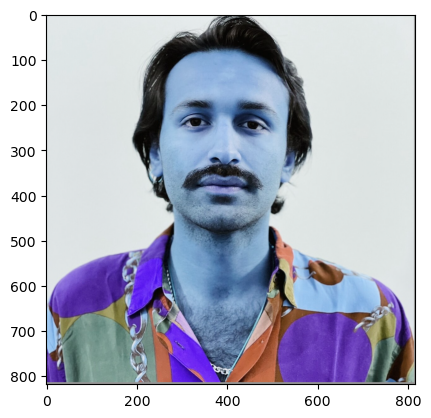

In [2]:
#import image
img = cv2.imread('Face.png')
show_image(img)


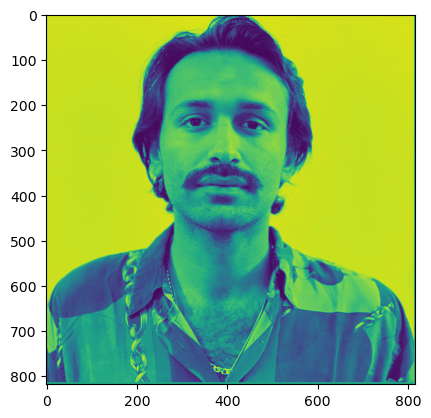

In [3]:
grayimg = color.rgb2gray(img)
show_image(grayimg)



In [4]:
thresh = threshold_otsu(grayimg)

In [5]:
binary = grayimg > thresh

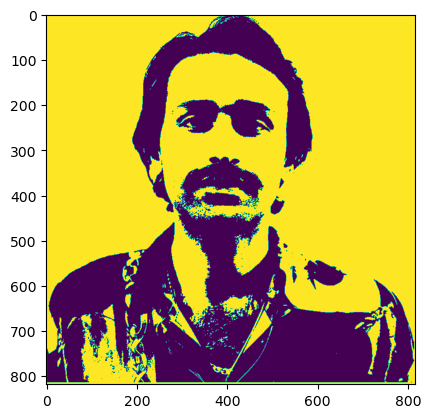

In [6]:
plt.imshow(binary)

In [7]:
#local

block_size = 35
local_thresh = threshold_local(img, block_size, offset=10)
binary_local = img > local_thresh

/Users/vanshmurad/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


In [8]:
#Unsupervised Segmentation (SLIC)

from skimage.segmentation import slic
from skimage. color import label2rgb

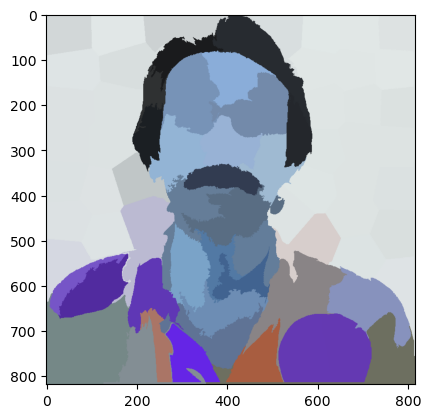

In [9]:
segments = slic(img)

segmented_img = label2rgb(segments, img, kind = 'avg')

plt.imshow(segmented_img)

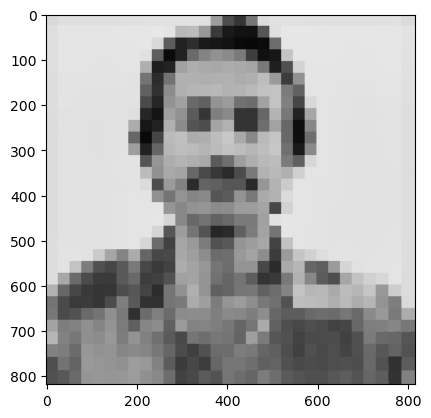

In [10]:
segments2 = slic(grayimg, n_segments = 1000)

segmented_img2 = label2rgb(segments2, grayimg, kind = 'avg')

plt.imshow(segmented_img2)

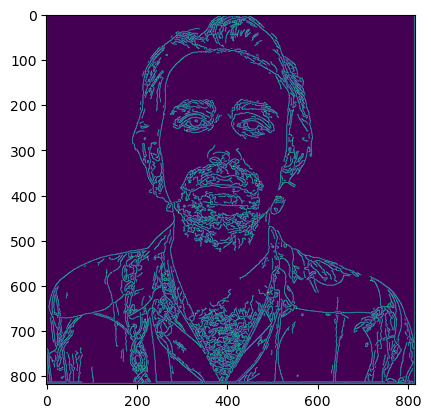

In [11]:
# canny edges
from skimage.feature import canny
import PIL
from PIL import Image

canny_edges = canny(grayimg)

plt.imshow(canny_edges)

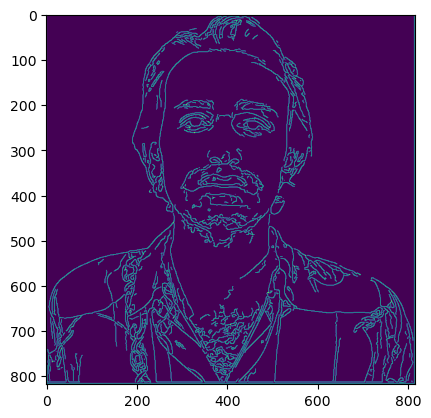

In [12]:
#better quality

canny_edges_05 = canny(grayimg, sigma = 1.5)

plt.imshow(canny_edges_05)